# Phase 2: Model Analysis

In [42]:
from __future__ import print_function
import sys
import math
import random
import pprint
import numpy as np
import pandas as pd
from astropy.io import ascii
import shap

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier, Pool, cv

In [43]:
def _impute(self, X):
    print (">> Impute, Factorize, and Scale Features")
    for c in X.columns:
        if X[c].dtype == 'object':
            X[c] = X[c].fillna(-1)
            X[c] = pd.factorize(X[c], sort=True)[0]
        if X[c].dtype == np.float64:
            X[c] = X[c].astype(np.float32)
            X[c] = X[c].fillna(-999)
            rscaler = StandardScaler()
            X[c] = rscaler.fit_transform(X[c].values.reshape(-1,1))

    return X

In [44]:



def getData(yColName, isFiltered):
    df = ascii.read('../data/raw/tces/kplr_dr25_inj1_tces.txt').to_pandas()
    df.head()

    # CHANGE HERE: Filter Data by Neg Type
    if isFiltered:
        df = df[(df.Disp == 'FP')]

    # Augment Target Value Encoding
    features = ["period", "epoch", "Expected_MES", "NTran", "depth", "duration", "Rp", "Rs", "Ts", "logg", "a", "Rp/Rs", "a/Rs", "impact", "SNR_DV", "Fit_Prov"]
    cat = ['NTL', 'CO', 'SS', 'EM']


    df['Disp'].replace('FP', 0, inplace=True)
    df['Disp'].replace('PC', 1, inplace=True)
    
    y = df[yColName]
    X = df[features]
    
    return X, y



In [45]:
X, y = getData('Disp', False)

In [50]:
def shapAnalysis(originalX, model, features):
    explainer = shap.TreeExplainer(model=model, feature_dependence='tree_path_dependent', model_output='margin')
    shap_values = explainer.shap_values(X=originalX)
    shap.summary_plot(shap_values, originalX)
    shap.summary_plot(shap_values, originalX, plot_type="bar")
    for feature in features:
        shap.dependence_plot(ind=feature, shap_values=shap_values, features=originalX)

def fitCatBoost(X_train, y_train, X_validation, y_validation):
    model = CatBoostClassifier(
        n_estimators=1000,
        custom_loss=['Accuracy'],
        random_seed=42,
        logging_level='Silent'
    )
    model.fit(
        X_train, y_train,
        eval_set=(X_validation, y_validation),
        plot=True
    );o
    return model
    
    
def analyze(X, y, feat):
    originalX, originalY = X, y
    X, X_test, y, y_test = train_test_split(originalX, originalY, train_size=0.90, random_state=42)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=42)
    
    model = fitCatBoost(X_train, y_train, X_validation, y_validation)
    shapAnalysis(originalX, model, feat)
    
    
    

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

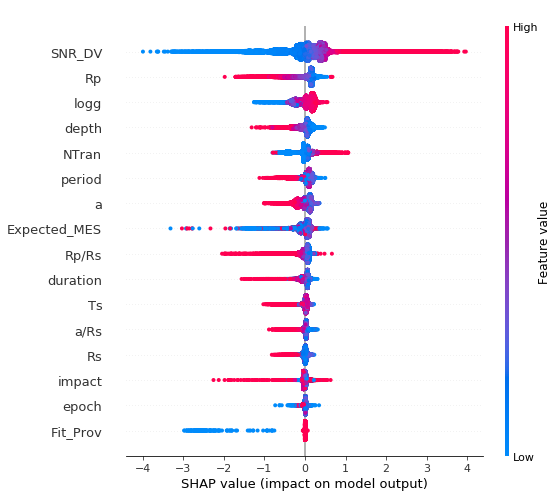

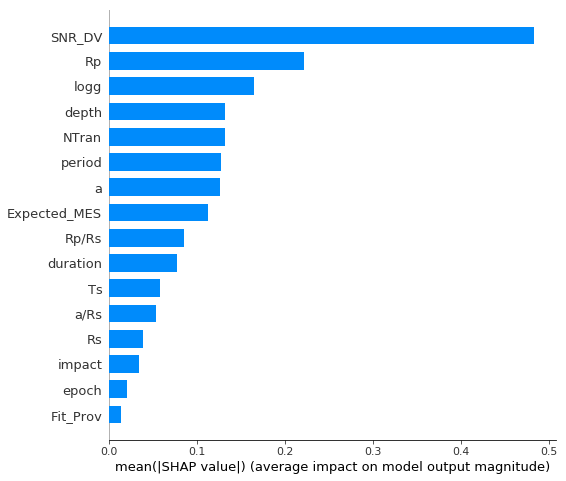

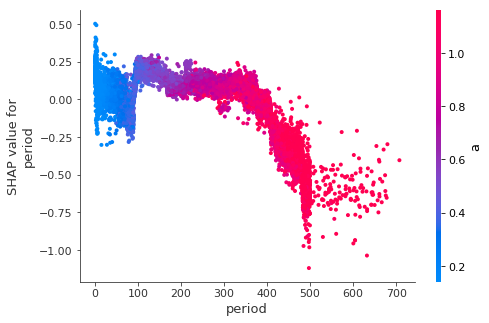

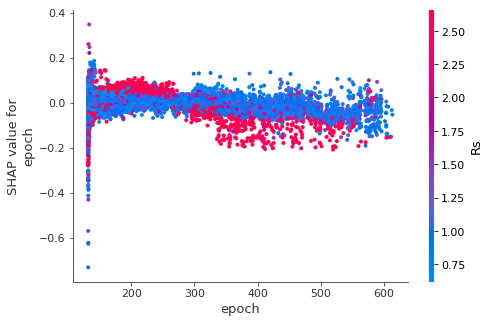

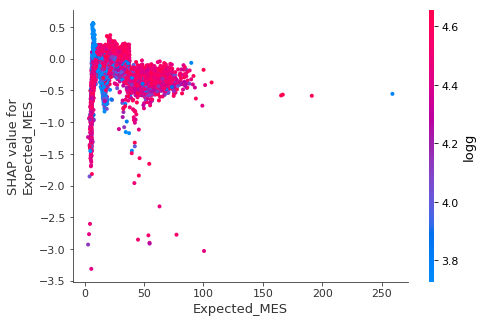

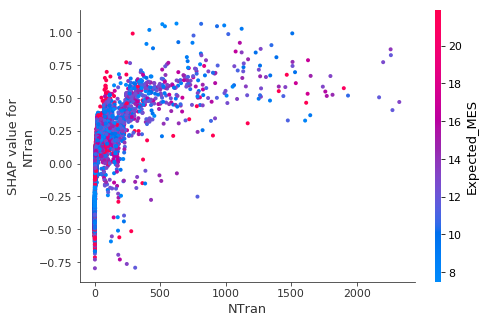

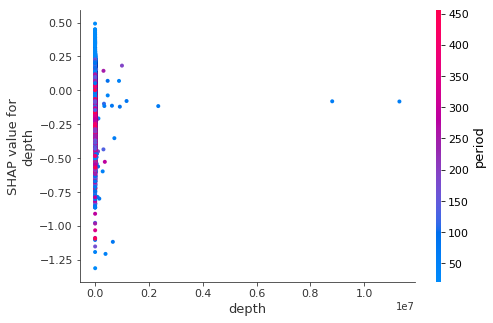

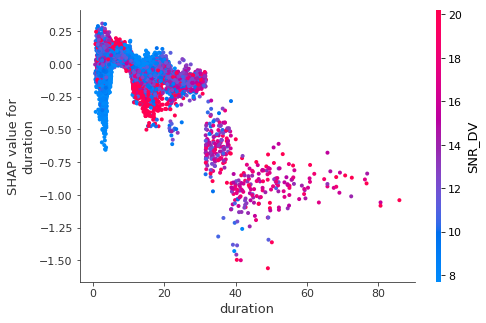

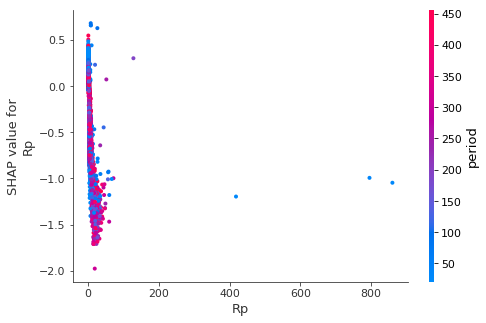

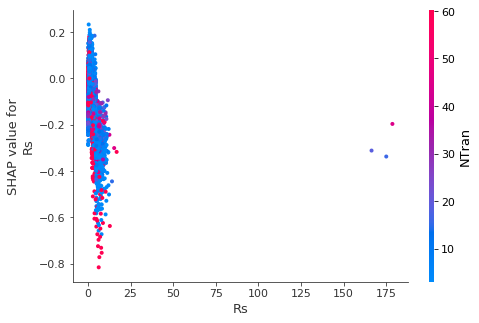

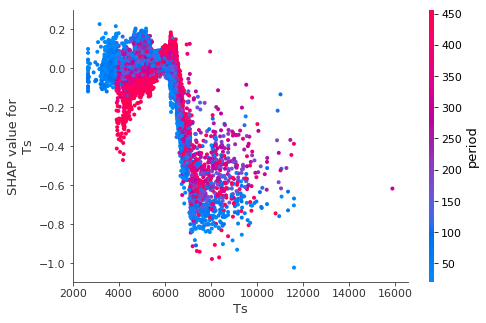

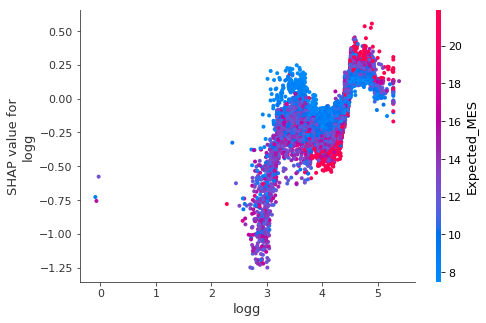

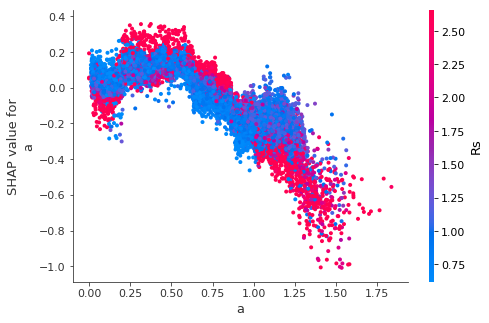

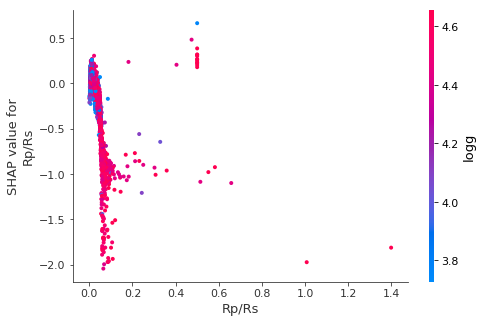

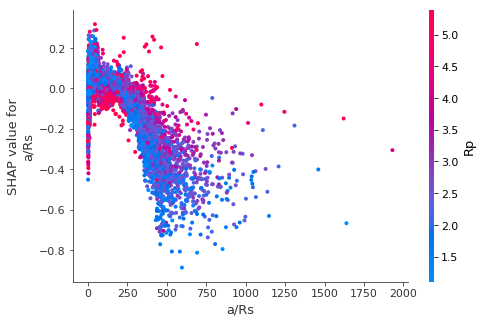

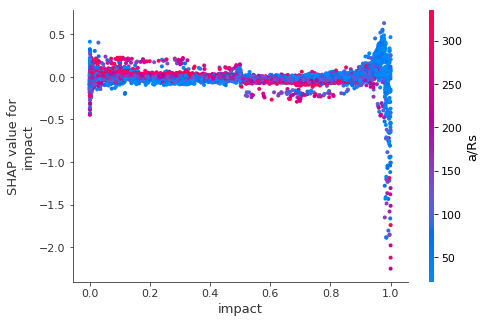

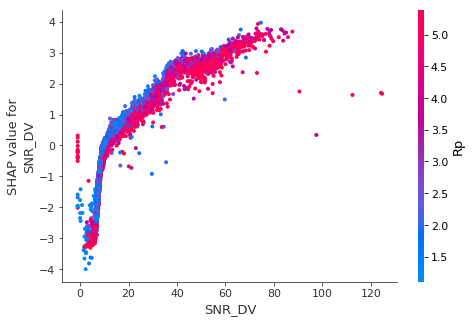

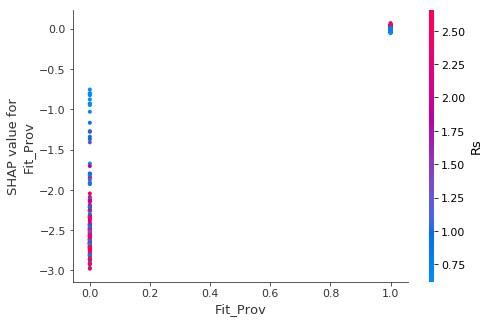

In [51]:
shap.initjs()
feat = ["period", "epoch", "Expected_MES", "NTran", "depth", "duration", "Rp", "Rs", "Ts", "logg", "a", "Rp/Rs", "a/Rs", "impact", "SNR_DV", "Fit_Prov"]
analyze(X, y, feat)

In [48]:
def count(data):
    classifiedCount = 0
    unClassifiedCount = 0
    for item in data:
        if item == 1:
            classifiedCount += 1
        else:
            unClassifiedCount += 1
    return classifiedCount, unClassifiedCount

def calculateTP(data):
    tpCount = 0
    totalCount = 0
    for d in data:
        if d == 1:
            tpCount += 1
        totalCount +=1
    
    return float(tpCount) / totalCount


# calculateTP(y)

classifiedCount, unClassifiedCount = count(y)
100 * classifiedCount / (classifiedCount + unClassifiedCount)


85.21497675033608

In [49]:
def truePositiveCount():
    X, y = getData('Disp', False)
    originalX, originalY = X, y
    X, X_test, y, y_test = train_test_split(originalX, originalY, train_size=0.90, random_state=42)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=42)
    
    model = fitCatBoost(X_train, y_train, X_validation, y_validation)
    y_pred = model.predict(X)
    
    classifiedCount, unClassifiedCount = count(y_pred)
    return 100 * classifiedCount / (classifiedCount + unClassifiedCount)

truePositiveCount()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

95.84710693209922

In [75]:
# From here, each classes


In [61]:
def getFalsePositiveData(yColName, isFiltered):
    df = ascii.read('../data/raw/tces/kplr_dr25_inj1_tces.txt').to_pandas()
    df.head()

    # CHANGE HERE: Filter Data by Neg Type
    if isFiltered:
        df = df[(df.Disp == 'FP')]

    # Augment Target Value Encoding
    features = ["period", "epoch", "Expected_MES", "NTran", "depth", "duration", "Rp", "Rs", "Ts", "logg", "a", "Rp/Rs", "a/Rs", "impact", "SNR_DV", "Fit_Prov"]
    cat = ['NTL', 'CO', 'SS', 'EM']


    df['Disp'].replace('FP', 0, inplace=True)
    df['Disp'].replace('PC', 1, inplace=True)
    
    falsePositive = df['Disp']==0
    data = df[falsePositive]
    y = data[yColName]
    X = data[features]
    
    return X, y
    

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

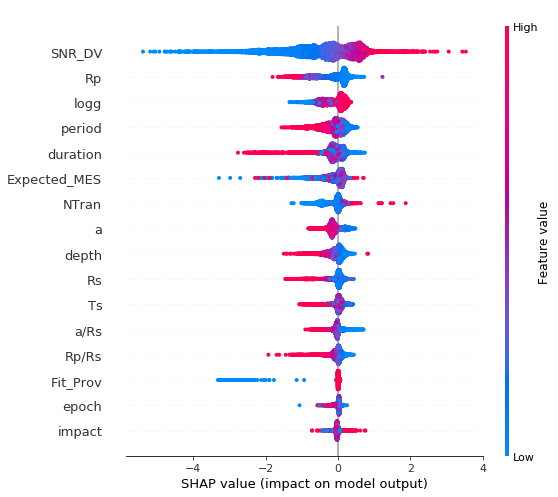

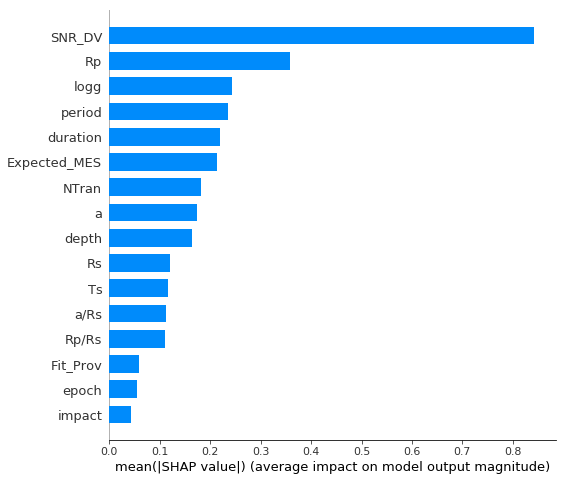

In [76]:
X, y = getFalsePositiveData('NTL', True)

shap.initjs()
analyze(X, y)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

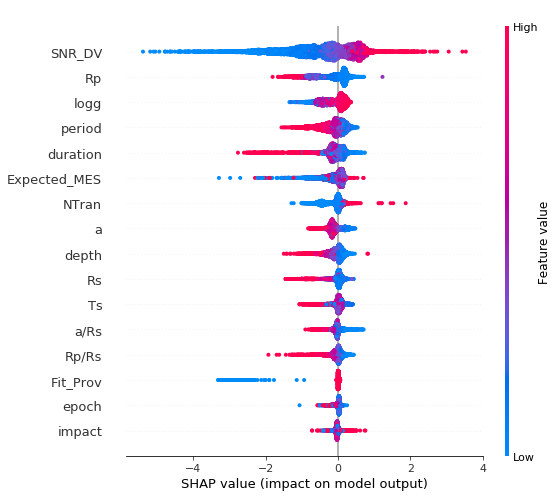

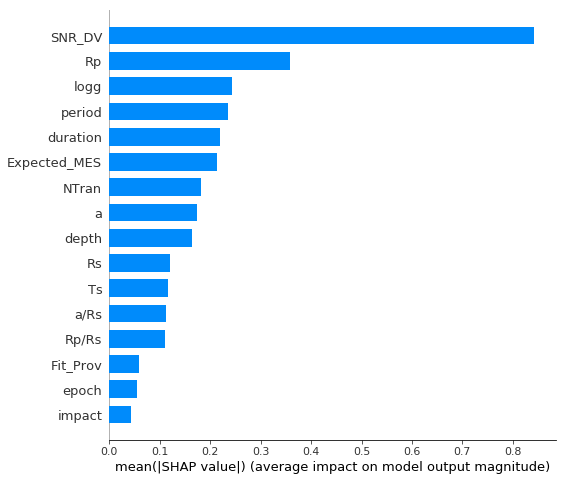

In [77]:
X, y = getFalsePositiveData('CO', True)

shap.initjs()
analyze(X, y)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

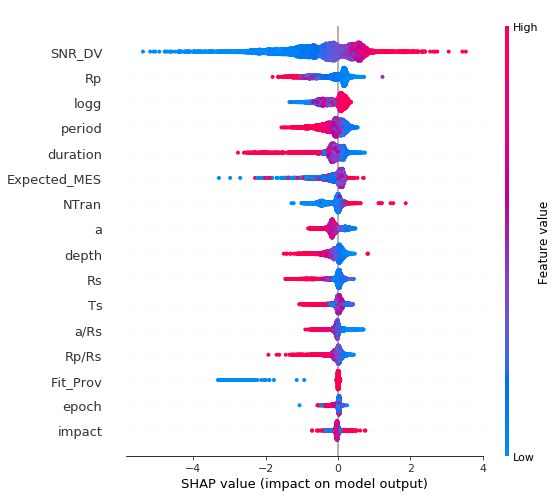

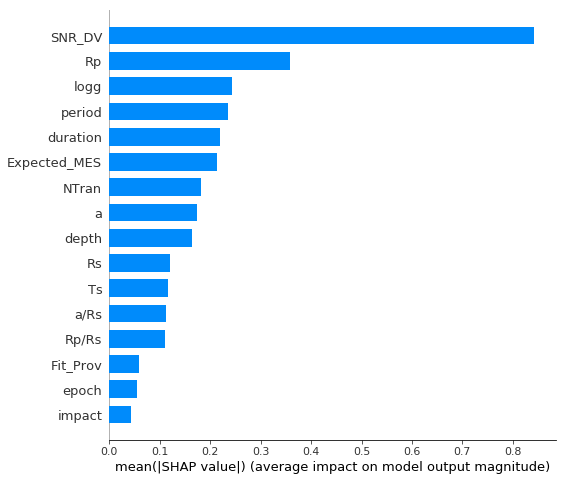

In [78]:
X, y = getFalsePositiveData('SS', True)

shap.initjs()
analyze(X, y)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

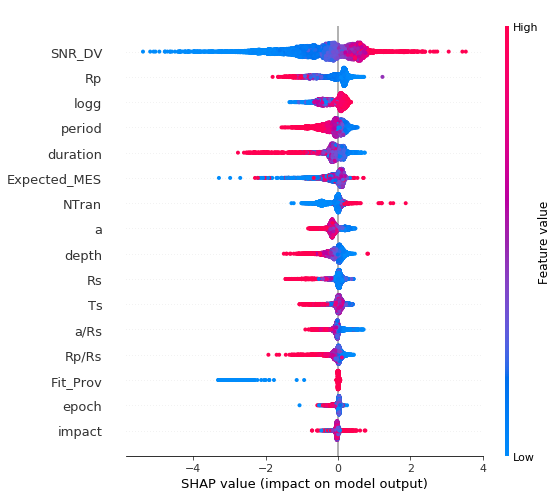

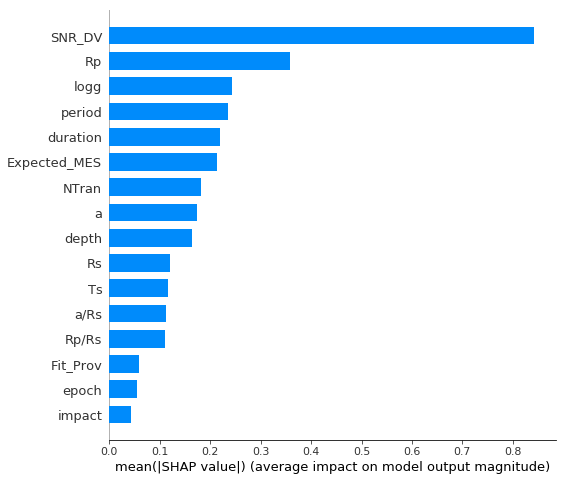

In [79]:
X, y = getFalsePositiveData('EM', True)

shap.initjs()
analyze(X, y)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

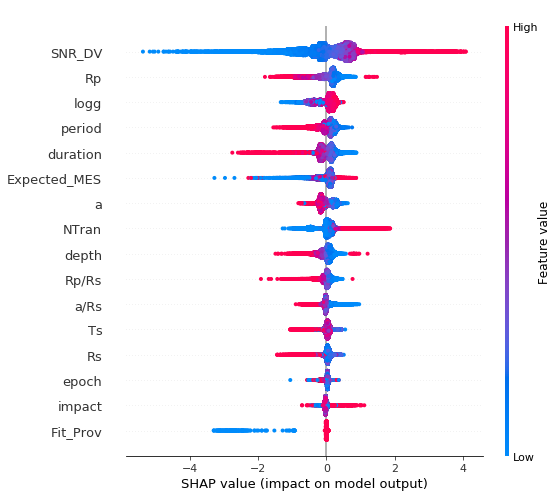

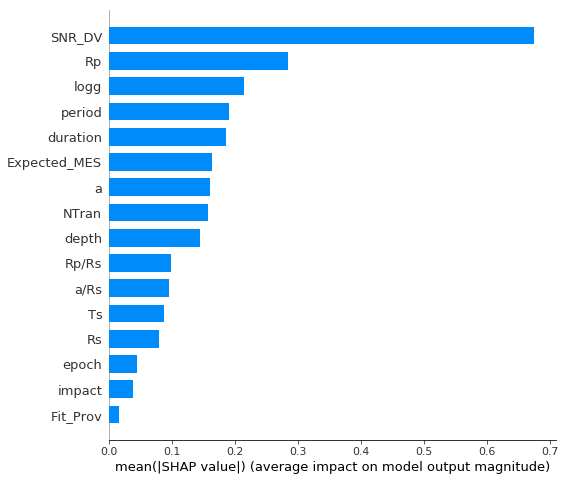

In [80]:
X, y = getFalsePositiveData('NTL', False)

shap.initjs()
analyze(X, y)